# El modelo epidémico de SIR
Una descripción matemática simple de la propagación de una enfermedad en una población es el llamado modelo SIR, que divide la población (fija) de N individuos en tres "compartimentos" que pueden variar en función del tiempo, t:

* S(t) son aquellos susceptibles pero aún no infectados con la enfermedad;
* I(t) es el número de individuos infecciosos;
* R(t) son aquellas personas que se han recuperado de la enfermedad y ahora tienen inmunidad.

El modelo SIR describe el cambio en la población de cada uno de estos compartimentos en términos de dos parámetros,  beta y  gamma.  
- Beta describe la tasa de contacto efectiva de la enfermedad: un individuo infectado entra en contacto con  beta*N otros individuos por unidad de tiempo (de los cuales la fracción que es susceptible a contraer la enfermedad es S/N).  
- Gamma es la tasa de recuperación promedio: es decir, 1/ gamma es el período de tiempo promedio durante el cual una persona infectada puede transmitirlo.

Las ecuaciones diferenciales que describen este modelo fueron derivadas primero por Kermack y McKendrick [ Proc. R. Soc. A , 115 , 772 (1927)]:

\begin{align*}
\frac{\mathrm{d}S}{\mathrm{d}t} &= -\frac{\beta S I}{N},\\
\frac{\mathrm{d}I}{\mathrm{d}t} &= \frac{\beta S I}{N} - \gamma I,\\
\frac{\mathrm{d}R}{\mathrm{d}t} &= \gamma I.
\end{align*}

El siguiente código de Python integra estas ecuaciones para una enfermedad caracterizada por los parámetros  beta=0.2, gamma=10  en una población de N=1000 (quizás 'gripe en una escuela ) El modelo se inicia con una sola persona infectada el día 0: I(0)=1. Las curvas trazadas de S(t), I(t) y R(t) están diseñadas para verse un poco mejor que los valores predeterminados de Matplotlib.

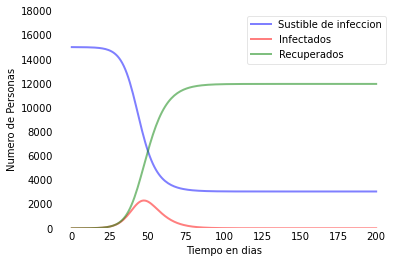

2.0


In [15]:
#Importar las librerias.
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total de la poblacion
N = 15000
# Numero Inicial de Infectados
I0 = 1
# Numero de Recuperados
R0 = 0
# Todos los demás, S0, son susceptibles a la infección inicialmente.
S0 = N - I0 - R0
# Tasa de contacto, beta (nivel de repoductividad del virus) 
# La tasa de recuperación media, gamma,(1/días) Una persona se recupera en 15 dias.
beta, gamma = 0.4, 1.0/5 
# Una cuadrícula de puntos de tiempo (en días)
t = np.linspace(0, 200, 200)


# Las ecuaciones diferenciales del modelo SIR..
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N 
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Vector de condiciones iniciales
y0 = S0, I0, R0
# Integre las ecuaciones SIR en la cuadrícula de tiempo, t. A traves de la funcion odeint()
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T # Obtenicion de resultados


#  Trace los datos en tres curvas separadas para S (t), I (t) y R (t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111,  axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Sustible de infeccion')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infectados')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recuperados')
ax.set_xlabel('Tiempo en dias')
ax.set_ylabel('Numero de Personas')
ax.set_ylim(0,N*1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

Ro = beta/gamma
print(Ro)


## Generar la prediccion del modelos SIR

 Se debe  estimar el valor de 
- β 
- γ

Para ajustar el modelo SIR con los casos confirmados reales (el número de personas infecciosas) del Ecuador.
 
 Para ello deben seguir el siguiente tutorial 
 https://www.lewuathe.com/covid-19-dynamics-with-sir-model.html
 


## Obtener beta y gama

### Implementar y explicar la predicion del modelo SIR para el Ecuador


### 1) 
Implementar teniendo en cuenta los casos confirmados y recuperados.

Beta: 
0.06700499042041419
Gamma: 
0.001
R0: 
67.00499042041419


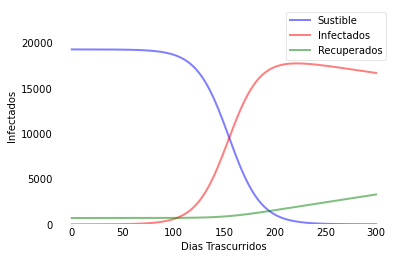

In [2]:
#Importar las librerias.
import numpy as np 
from datetime import datetime,timedelta
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd,requests,sys,numpy as np, matplotlib, math, matplotlib.pyplot as plt,scipy
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from IPython.display import display



def loss(point, data, rf, s_0, i_0, r_0):
     
    size = len(data)
    beta, gamma = point
    
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - rf)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2

fecha="2/1/20" 

urlt = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
df = pd.read_csv(urlt)
pais = df[df['Country/Region'] == "Ecuador"]
recuperados = pais.iloc[0].loc[fecha:]

urld = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
df = pd.read_csv(urld)
pais = df[df['Country/Region'] == "Ecuador"]
muertos = pais.iloc[0].loc[fecha:]

urlc = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df = pd.read_csv(urlc)
pais = df[df['Country/Region'] == "Ecuador"]
confirmados = pais.iloc[0].loc[fecha:]


data = (confirmados - recuperados - muertos)
 
# Total de la poblacion
N = 20000
# Numero Inicial de Infectados
I0 = 1
# Numero de Recuperados
R0 = recuperados[len(recuperados)-1]
# Todos los demás, S0, son susceptibles a la infección inicialmente.
S0 = N - I0 - R0

optimal = minimize(loss, [0.0001, 0.0001], args=(data, recuperados, S0, I0, R0), method='L-BFGS-B', bounds=[(0.00000001, 0.4), (0.00000001, 0.4)])
beta, gamma = optimal.x

beta *= 10000
gamma *= 100000 

print('Beta: ' )
print(beta)
print('Gamma: ')
print(gamma)
print("R0: ")
print(beta/gamma)

t = np.linspace(0, 300, 300)

# Las ecuaciones diferenciales del modelo SIR..
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N 
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

y0 = S0, I0, R0
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T


fig = plt.figure(facecolor='w')

ax = fig.add_subplot(111,  axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Sustible')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infectados')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recuperados')
ax.set_xlabel('Dias Trascurridos')
ax.set_ylabel('Infectados')
ax.set_ylim(0,N*1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()




### 2)
Implementar solo teniendo en cuenta los casos confirmados

Beta: 
0.06574052158070362
Gamma: 
0.03315478556117861
R0: 
1.9828365790331062


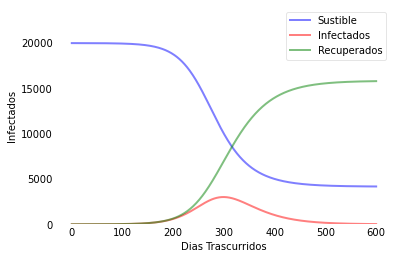

In [5]:
#Importar las librerias.
import numpy as np 
from datetime import datetime,timedelta
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd,requests,sys,numpy as np, matplotlib, math, matplotlib.pyplot as plt,scipy
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from IPython.display import display



def loss(point, data, rf, s_0, i_0, r_0):
     
    size = len(data)
    beta, gamma = point
    
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - rf)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2

fecha="2/1/20" 

urlt = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
df = pd.read_csv(urlt)
pais = df[df['Country/Region'] == "Ecuador"]
recuperados = pais.iloc[0].loc[fecha:]

urld = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
df = pd.read_csv(urld)
pais = df[df['Country/Region'] == "Ecuador"]
muertos = pais.iloc[0].loc[fecha:]

urlc = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df = pd.read_csv(urlc)
pais = df[df['Country/Region'] == "Ecuador"]
confirmados = pais.iloc[0].loc[fecha:]


data = (confirmados)
 
# Total de la poblacion
N = 20000
# Numero Inicial de Infectados
I0 = 1
# Numero de Recuperados
R0 = 0
# Todos los demás, S0, son susceptibles a la infección inicialmente.
S0 = N - I0 - R0

optimal = minimize(loss, [0.0001, 0.0001], args=(data, 0, S0, I0, R0), method='L-BFGS-B', bounds=[(0.00000001, 0.4), (0.00000001, 0.4)])
beta, gamma = optimal.x

beta *= 10000
gamma *= 100000 

print('Beta: ' )
print(beta)
print('Gamma: ')
print(gamma)
print("R0: ")
print(beta/gamma)

t = np.linspace(0,600, 600)

# Las ecuaciones diferenciales del modelo SIR..
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N 
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

y0 = S0, I0, R0
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T


fig = plt.figure(facecolor='w')

ax = fig.add_subplot(111,  axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Sustible')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infectados')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recuperados')
ax.set_xlabel('Dias Trascurridos')
ax.set_ylabel('Infectados')
ax.set_ylim(0,N*1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()




## Calculos de incidencia

Para obtener metricas de incidencia se debe calcular la tasa de prevalencia, incidencia y la relacion, para esto leer y obtener estos datos con la ultima lectura.

https://www.paho.org/hq/index.php?option=com_content&view=article&id=14402:indicadores-de-salud-aspectos-conceptuales-y-operativos-seccion-2&catid=9894&limitstart=2&Itemid=101&lang=es

In [57]:
# Implementar
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df = pd.read_csv(url)
pais = df[df['Country/Region'] == "Ecuador"]
confirmados = pais.iloc[0].loc[fecha:]
poblacion = 17387083

conf=confirmados[-1]

riesgo= poblacion-conf
#print (riesgo)

def incidencia(contagios,riesgo,n):
    return (contagios/riesgo)*pow(10,n)
def prevalencia(casos,poblacion):
    return (casos/poblacion)*100
def relacion(incidencia,tiempo):
    return incidencia*tiempo


inc= incidencia(confirmados[-1],riesgo,5)
print("Incidencia: ",inc, " %")

prev= prevalencia(confirmados[-1],N)
print("Prevalencia: ",prev, " %")

rel=relacion(inc,180)
print("Relacion: ", rel)

Incidencia:  43.74699358093568  %
Prevalencia:  4.713577185368878  %
Relacion:  7874.458844568422


## Analisis
Dado el análisis del SIR podemos obtener un acercamiento a lo eventos que podría suscitarse en un futuro, esto se lo hace en base a lo obtenido hasta es estado actual.


## Conclusiones
En conclusión podemos decir que el modelo sir y las tazas analizadas podrían darnos una visión de las medidas que se pueden tomar en un futuro para cualquier análisis de datos.


## Opinion

En mi opinión las tazas no se acercan a la situación real que se está viviendo, por lo tanto no se puede dar una certeza de lo que se muestra en este trabajo sea correcto para una predicción  a futuro.

# Referencias:
- https://www.agenciasinc.es/Reportajes/Un-modelo-un-teorema-y-teoria-de-juegos-contra-el-coronavirus
- https://rpubs.com/dsfernandez/422937
- https://towardsdatascience.com/modelling-the-coronavirus-epidemic-spreading-in-a-city-with-python-babd14d82fa2